1. Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [5]:
# Load the dataset
file_path = '/content/cardekho.csv'
df = pd.read_csv(file_path)


In [9]:
# Check for missing values
missing_values = df.isnull().sum()

Missing values in each column:
 name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

Percentage of missing values:
 name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    3.190875
engine                3.190875
max_power             3.104245
seats                 3.190875
dtype: float64


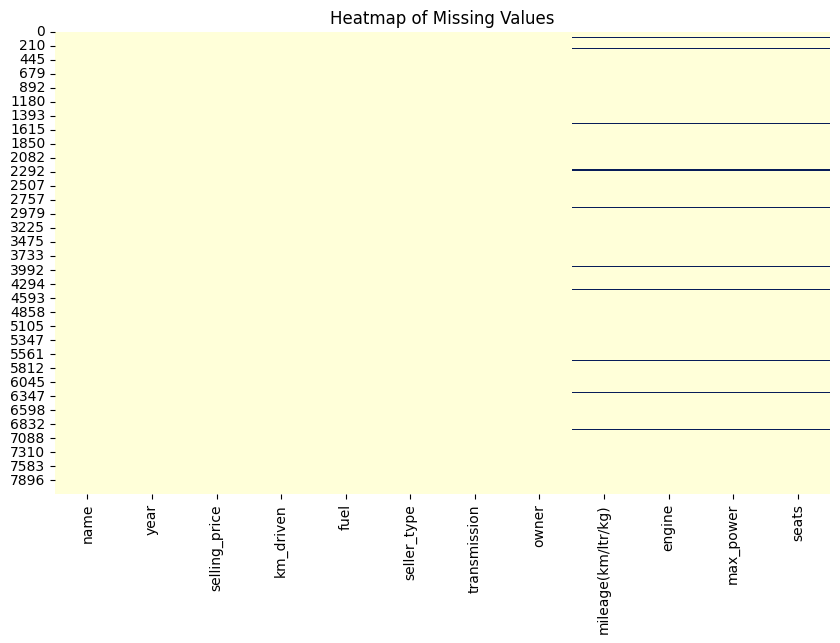

In [16]:
# Display missing value counts
print("Missing values in each column:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percentage)

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')  # Use a lighter colormap
plt.title('Heatmap of Missing Values')
plt.show()

2.Data Exploration

In [12]:
# Display the number of rows and columns
print("Number of rows and columns:", df.shape)

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:\n", df.head())

# Data types of each column
print("\nData types of columns:\n", df.dtypes)

# Summary statistics for numeric columns
print("\nSummary statistics:\n", df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()
print(f"\nData shape after removing duplicates: {df.shape}")


Number of rows and columns: (6926, 12)

First 5 rows of the dataset:
                            name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1   

3. Categorical Data Encoding

In [13]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", categorical_cols)

# Apply one-hot encoding (or other encoding methods)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nData after encoding:\n", df_encoded.head())



Categorical columns: Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power'], dtype='object')

Data after encoding:
    year  selling_price  km_driven  mileage(km/ltr/kg)  engine  seats  \
0  2014         450000     145500               23.40  1248.0    5.0   
1  2014         370000     120000               21.14  1498.0    5.0   
2  2006         158000     140000               17.70  1497.0    5.0   
3  2010         225000     127000               23.00  1396.0    5.0   
4  2007         130000     120000               16.10  1298.0    5.0   

   name_Ambassador Classic 2000 DSZ AC PS  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   name_Ambassador Grand 1500 DSZ BSIII  name_Ambassador Grand 2000 DSZ PW CL  \
0                                 False                                 False

4. Data Cleaning

In [18]:
# Example: Replacing invalid values (e.g., negative values in certain columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    # Replace negative values with NaN and fill them later
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

# Handle missing values for numerical data (e.g., filling NaNs with median)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Check for inconsistencies in categorical data (e.g., typos, case sensitivity)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in {col} before cleaning:\n", df[col].unique())

    # Example: Standardizing text data
    df[col] = df[col].str.lower().str.strip()

    print(f"\nUnique values in {col} after cleaning:\n", df[col].unique())

    # Handle missing values for categorical data (e.g., filling NaNs with mode)
    df[col] = df[col].fillna(df[col].mode()[0])

# Check for duplicates
df = df.drop_duplicates()

# Optionally, detect and remove outliers for numeric data
from scipy.stats import zscore
df[numeric_cols] = df[numeric_cols].apply(lambda x: x[(np.abs(zscore(x)) < 3)])

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)





Unique values in name before cleaning:
 ['maruti swift dzire vdi' 'skoda rapid 1.5 tdi ambition'
 'honda city 2017-2020 exi' ... 'tata nexon 1.5 revotorq xt'
 'ford freestyle titanium plus diesel bsiv'
 'toyota innova 2.5 gx (diesel) 8 seater bs iv']

Unique values in name after cleaning:
 ['maruti swift dzire vdi' 'skoda rapid 1.5 tdi ambition'
 'honda city 2017-2020 exi' ... 'tata nexon 1.5 revotorq xt'
 'ford freestyle titanium plus diesel bsiv'
 'toyota innova 2.5 gx (diesel) 8 seater bs iv']

Unique values in fuel before cleaning:
 ['diesel' 'petrol' 'lpg' 'cng']

Unique values in fuel after cleaning:
 ['diesel' 'petrol' 'lpg' 'cng']

Unique values in seller_type before cleaning:
 ['individual' 'dealer' 'trustmark dealer']

Unique values in seller_type after cleaning:
 ['individual' 'dealer' 'trustmark dealer']

Unique values in transmission before cleaning:
 ['manual' 'automatic']

Unique values in transmission after cleaning:
 ['manual' 'automatic']

Unique values in owner befo

<ipython-input-18-ee1c3bc2f175>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(lambda x: x[(np.abs(zscore(x)) < 3)])


5. Visualization Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set up visual style
sns.set_style("whitegrid")

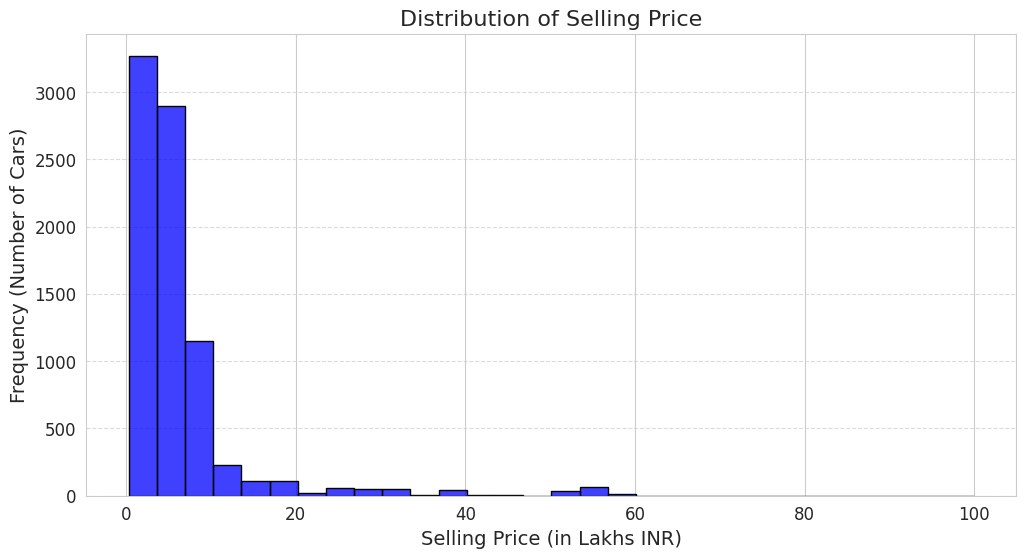

In [ ]:
# 1. Distribution of numeric variables
# Convert Selling Price to Lakhs (if in INR)
dataset['selling_price_lakhs'] = dataset['selling_price'] / 100000  # Convert to lakhs

# draw histogram with adjusted scaling
plt.figure(figsize=(12, 6))
sns.histplot(dataset['selling_price_lakhs'], kde=False, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (in Lakhs INR)', fontsize=14)
plt.ylabel('Frequency (Number of Cars)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights from the Distribution of Selling Price

1. **Concentration of Cars in Lower Price Range**  
   - The majority of cars are sold within the **0–10 lakhs INR** range. This reflects a market dominated by budget and mid-range vehicles.  

2. **Exponential Decline in Frequency**  
   - As the selling price increases, there is a significant drop in the number of cars. Beyond **20 lakhs INR**, the frequency of cars becomes negligible. This suggests that cars priced in higher ranges (luxury vehicles) are less common.  

3. **Right-Skewed Distribution**  
   - The histogram indicates a right-skewed distribution, meaning that while most cars are priced lower, there are a small number of cars with significantly higher prices. These may represent luxury or premium vehicles.


<ipython-input-10-8a88936e1230>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='Set2')


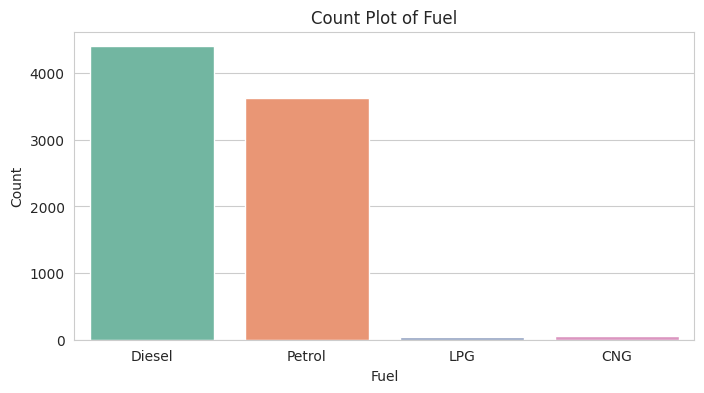

<ipython-input-10-8a88936e1230>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='Set2')


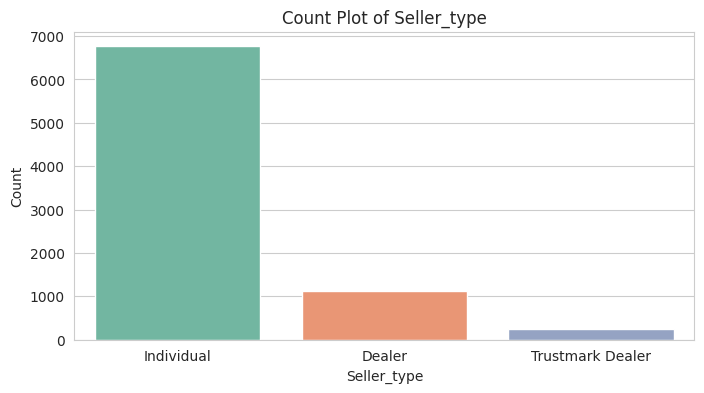

<ipython-input-10-8a88936e1230>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, palette='Set2')


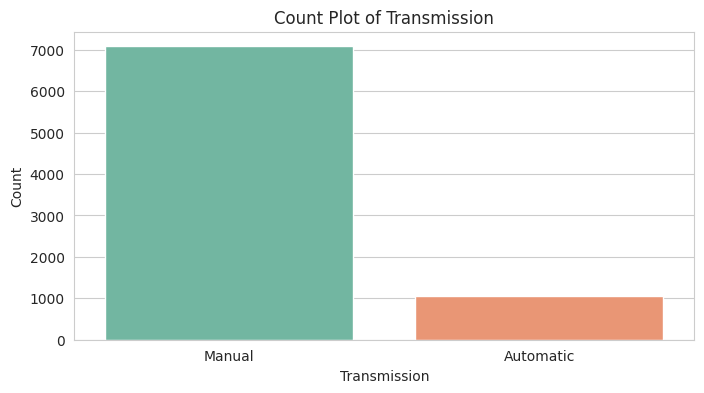

In [ ]:
# 2. Count plots for categorical variables
categorical_columns = ['fuel', 'seller_type', 'transmission']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, palette='Set2')
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

### Insights from the Count Plot of Fuel

1. **Dominance of Diesel and Petrol Vehicles**  
   - Diesel and Petrol are the most commonly used fuel types, with Diesel having the highest count. This indicates that the market is predominantly focused on vehicles using these fuel types.  

2. **Minimal Presence of LPG and CNG Vehicles**  
   - LPG and CNG vehicles have significantly lower counts, suggesting limited adoption of alternative fuel types in the dataset.  

3. **Market Trend**  
   - The higher count of Diesel and Petrol vehicles aligns with their widespread availability and infrastructure support in most regions. LPG and CNG might be niche markets or more common in specific areas.


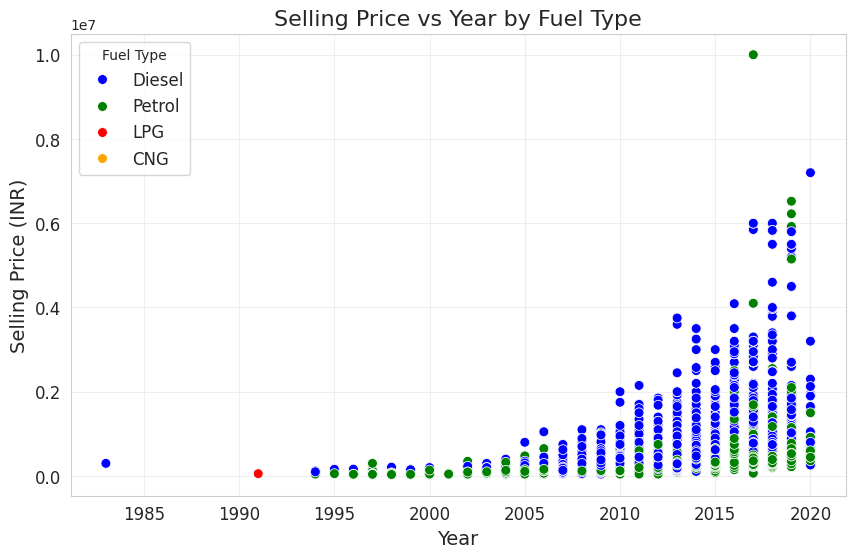

In [ ]:
# 3. Relationships with Selling Price
# (a) Scatter plot: Selling Price vs Year
# Define a custom color palette for fuel types
fuel_colors = {
    'Diesel': 'blue',
    'Petrol': 'green',
    'CNG': 'orange',
    'LPG': 'red'
}

# Scatter plot: Selling Price vs Year with distinct colors for each fuel type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='year', y='selling_price', hue='fuel', palette=fuel_colors, s=50)
plt.title('Selling Price vs Year by Fuel Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price (INR)', fontsize=14)
plt.legend(title='Fuel Type', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Insights from the Scatter Plot of Selling Price vs Year by Fuel Type

1. **Rising Selling Prices Over Time**  
   - A noticeable increase in vehicle selling prices over the years is evident, particularly after 2010. This could be due to inflation, improved vehicle features, or growing demand for newer models.  

2. **Dominance of Diesel and Petrol Vehicles**  
   - Diesel vehicles are more prevalent in the higher price ranges compared to other fuel types, while Petrol vehicles show a wide distribution across different price levels.  

3. **Limited Representation of CNG and LPG Vehicles**  
   - Vehicles running on CNG and LPG are relatively scarce in the dataset, and they generally fall into the lower price range, indicating a niche market presence.  

4. **Recent Year Trends**  
   - The clustering of higher-priced vehicles in recent years suggests increased preference for advanced, fuel-efficient models, predominantly Diesel and Petrol vehicles.


<ipython-input-12-9106520e79f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='transmission', y='selling_price', palette='Set3')


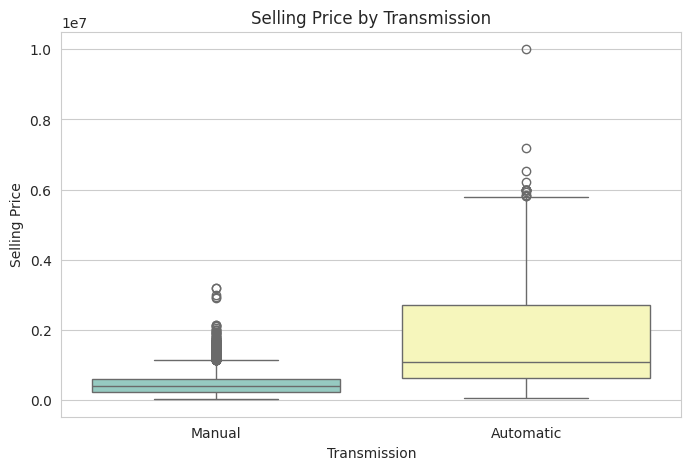

In [ ]:
# (b) Box plot: Selling Price by Transmission
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset, x='transmission', y='selling_price', palette='Set3')
plt.title('Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

### Insights from the Box Plot of Selling Price by Transmission

1. **Higher Selling Prices for Automatic Vehicles**  
   - Vehicles with automatic transmission tend to have a significantly higher median selling price compared to manual transmission vehicles. This indicates that automatic vehicles are often perceived as premium or luxury options.  

2. **Wider Price Range for Automatic Transmission**  
   - Automatic vehicles exhibit a broader range of selling prices, including outliers in the higher price bracket, suggesting a diverse market for these vehicles.  

3. **Compact Price Range for Manual Transmission**  
   - Manual vehicles show a relatively compact price distribution, with fewer outliers and lower overall prices. This aligns with their popularity in budget-friendly or entry-level vehicle segments.  

4. **Market Preferences**  
   - The box plot highlights a potential consumer preference for automatic vehicles in higher price ranges, which could be attributed to convenience, advanced features, or higher manufacturing costs.


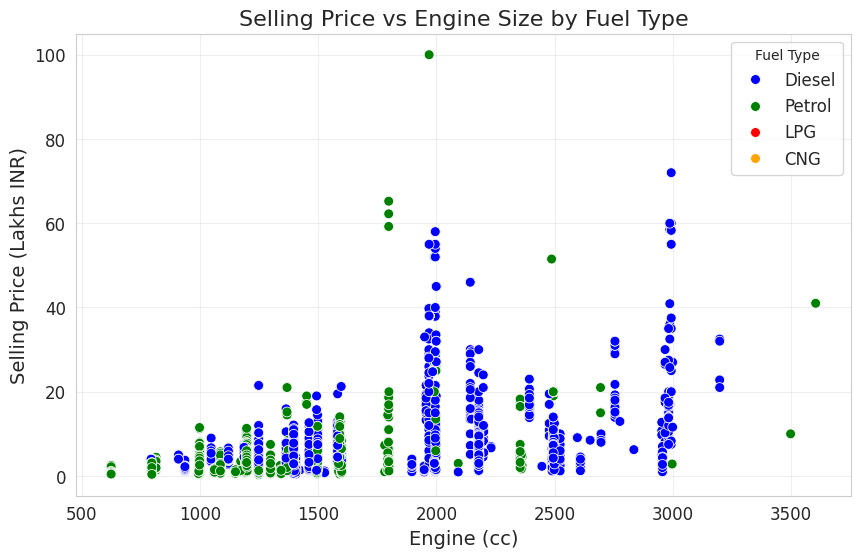

In [ ]:
# Define a custom color palette for fuel types
fuel_colors = {
    'Diesel': 'blue',
    'Petrol': 'green',
    'CNG': 'orange',
    'LPG': 'red'
}

# Convert Selling Price to Lakhs (if in INR)
dataset['selling_price_lakhs'] = dataset['selling_price'] / 100000  # Convert to lakhs

# Scatter plot: Selling Price vs Engine Size with distinct colors for each fuel type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='engine', y='selling_price_lakhs', hue='fuel', palette=fuel_colors, s=50)
plt.title('Selling Price vs Engine Size by Fuel Type', fontsize=16)
plt.xlabel('Engine (cc)', fontsize=14)
plt.ylabel('Selling Price (Lakhs INR)', fontsize=14)
plt.legend(title='Fuel Type', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


### Insights from the Scatter Plot of Selling Price vs Engine Size by Fuel Type

1. **Positive Correlation Between Engine Size and Selling Price**  
   - Vehicles with larger engines tend to have higher selling prices, particularly beyond 2000 cc, reflecting the premium nature of larger-engine vehicles.

2. **Dominance of Diesel and Petrol Vehicles**  
   - Most vehicles are powered by Diesel and Petrol, as evidenced by the dense clusters of blue (Diesel) and green (Petrol) points.

3. **Limited Representation of CNG and LPG Vehicles**  
   - CNG (orange) and LPG (red) vehicles are sparse, with their selling prices and engine sizes generally lower than those of Diesel and Petrol vehicles.

4. **Outliers in the Market**  
   - Some Diesel and Petrol vehicles with large engines (above 2500 cc) are priced exceptionally high, exceeding ₹60-80 lakhs. These are likely luxury or high-performance vehicles.

5. **Diesel Vehicles with Larger Engines**  
   - Diesel-powered vehicles typically feature larger engine capacities compared to Petrol vehicles, making them suitable for heavy-duty or high-performance purposes.

6. **Market Segmentation**  
   - The scatter plot suggests a diverse market, where Diesel vehicles cater to the high-performance or utility segment, while Petrol vehicles dominate the mid-range market.
